In [3]:
!pip install boto3
!pip install  --upgrade mxnet
!pip install autogluon
!pip install --upgrade scipy
import seaborn as sns

     |████████████████████████████████| 132 kB 12.8 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 8.8 MB 65.5 MB/s 
     |████████████████████████████████| 138 kB 76.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 49.1 MB 95 kB/s 
     |████████████████████████████████| 127 kB 73.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:

In [4]:
!pip3 install auto-sklearn

  Using cached dask-2022.2.0-py3-none-any.whl (1.1 MB)
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
  Using cached distributed-2022.2.0-py3-none-any.whl (837 kB)
  Attempting uninstall: dask
    Found existing installation: dask 2021.11.2
    Uninstalling dask-2021.11.2:
      Successfully uninstalled dask-2021.11.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: distributed
    Found existing installation: distributed 2021.11.2
    Uninstalling distributed-2021.11.2:
      Successfully uninstalled distributed-2021.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import pandas as pd
import autogluon as ag
import datetime as dt
import boto3
import os, sys
import io
from autogluon.tabular import TabularDataset, TabularPredictor

In [1]:
import autosklearn.classification

In [4]:
train = pd.read_csv('x_train_tab.csv')
test = pd.read_csv('t_test_tab.csv')

In [6]:
# leaving out all weak features for now
features = [
    'apy',
    'tvlUsd',
    'apyMeanExpanding',
    'apyStdExpanding',
    'chain_factorized',
    'project_factorized',
    'target'
#     'ilRisk_factorized',
#     'exposure_factorized',
#     'stablecoin_factorized',
]

In [7]:
from autogluon.tabular import TabularDataset, TabularPredictor
X_train_tab = TabularDataset(train[features])
X_test_tab  = TabularDataset(test[features])

predictor = TabularPredictor(label='target').fit(train_data=X_train_tab)


No path specified. Models will be saved in: "AutogluonModels/ag-20220518_180216/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220518_180216/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    20839
Train Data Columns: 6
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11797.89 MB
	Train Data (Original)  Memory Usage: 1.0 MB (0.0% of available memory)
	Inferring data type of each featu

[1000]	valid_set's binary_error: 0.193378
[2000]	valid_set's binary_error: 0.178023
[3000]	valid_set's binary_error: 0.167946
[4000]	valid_set's binary_error: 0.165067
[5000]	valid_set's binary_error: 0.161708
[6000]	valid_set's binary_error: 0.158829
[7000]	valid_set's binary_error: 0.15691
[8000]	valid_set's binary_error: 0.158349


	0.8445	 = Validation score   (accuracy)
	17.26s	 = Training   runtime
	2.0s	 = Validation runtime
Fitting model: LightGBM ...
	0.8253	 = Validation score   (accuracy)
	1.31s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.845	 = Validation score   (accuracy)
	7.05s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.8431	 = Validation score   (accuracy)
	13.47s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: CatBoost ...
	0.8436	 = Validation score   (accuracy)
	87.58s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.8512	 = Validation score   (accuracy)
	2.34s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.8488	 = Validation score   (accuracy)
	2.54s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.738	 = Validation score   (accuracy)
	25.06s	 = Training   runtime
	0.05

[1000]	valid_set's binary_error: 0.148752


	0.8556	 = Validation score   (accuracy)
	5.21s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	0.8661	 = Validation score   (accuracy)
	1.19s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 220.8s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20220518_180216/")


In [14]:
test_data_nolab = X_test_tab.drop(columns=['target'])
predictions_prob = predictor.predict_proba(X_test_tab)

In [20]:
predictor.leaderboard(X_test_tab, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.804524,0.866123,2.477897,0.829740,164.512984,0.015745,0.004945,1.193465,2,True,14
1,LightGBMXT,0.799959,0.844530,8.997833,2.004536,17.257434,8.997833,2.004536,17.257434,1,True,3
2,RandomForestGini,0.799046,0.845010,0.480320,0.207886,7.046893,0.480320,0.207886,7.046893,1,True,5
3,ExtraTreesEntr,0.799046,0.848848,0.539518,0.207520,2.542456,0.539518,0.207520,2.542456,1,True,9
4,RandomForestEntr,0.798539,0.843090,0.477783,0.207804,13.465121,0.477783,0.207804,13.465121,1,True,6
5,LightGBM,0.797931,0.825336,0.189514,0.058671,1.307764,0.189514,0.058671,1.307764,1,True,4
6,CatBoost,0.796003,0.843570,0.041698,0.015182,87.583334,0.041698,0.015182,87.583334,1,True,7
7,ExtraTreesGini,0.795192,0.851248,0.526472,0.207837,2.338859,0.526472,0.207837,2.338859,1,True,8
8,LightGBMLarge,0.792757,0.855566,0.942866,0.194172,5.211824,0.942866,0.194172,5.211824,1,True,13
9,XGBoost,0.791337,0.843570,0.215915,0.060570,4.741434,0.215915,0.060570,4.741434,1,True,11


In [18]:
perf = predictor.evaluate_predictions(y_true=X_test_tab['target'], y_pred=predictions_prob, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.8045242442686144
Evaluations on test data:
{
    "accuracy": 0.8045242442686144,
    "balanced_accuracy": 0.7857429800370437,
    "mcc": 0.5789637162791499,
    "roc_auc": 0.8830257505221687,
    "f1": 0.8461968233697821,
    "precision": 0.8316598682146219,
    "recall": 0.861251015434606
}


In [23]:
predictor.leaderboard(X_test_tab, extra_metrics=['accuracy', 'balanced_accuracy', 'log_loss','f1','roc_auc','precision'], silent=True)

/usr/local/lib/python3.7/dist-packages/autogluon/core/metrics/__init__.py:486: RuntimeWarning: divide by zero encountered in log
  return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
/usr/local/lib/python3.7/dist-packages/autogluon/core/metrics/__init__.py:486: RuntimeWarning: divide by zero encountered in log
  return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
/usr/local/lib/python3.7/dist-packages/autogluon/core/metrics/__init__.py:486: RuntimeWarning: divide by zero encountered in log
  return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
/usr/local/lib/python3.7/dist-packages/autogluon/core/metrics/__init__.py:486: RuntimeWarning: divide by zero encountered in log
  return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
/usr/local/lib/python3.7/dist-packages/autogluon/core/metrics/__init__.py:486: RuntimeWarning: divide by zero encountered in log
  return - (y_true * np.log(y_pred)

,model,score_test,accuracy,balanced_accuracy,log_loss,f1,roc_auc,precision,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.804524,0.804524,0.785743,-0.428605,0.846197,0.883026,0.831660,0.866123,2.647113,0.829740,164.512984,0.012910,0.004945,1.193465,2,True,14
1,LightGBMXT,0.799959,0.799959,0.783486,-0.465289,0.841377,0.869566,0.833201,0.844530,9.236757,2.004536,17.257434,9.236757,2.004536,17.257434,1,True,3
2,RandomForestGini,0.799046,0.799046,0.780012,-0.436342,0.841836,0.869871,0.827630,0.845010,0.476140,0.207886,7.046893,0.476140,0.207886,7.046893,1,True,5
3,ExtraTreesEntr,0.799046,0.799046,0.779205,-inf,0.842214,0.873931,0.826094,0.848848,0.623997,0.207520,2.542456,0.623997,0.207520,2.542456,1,True,9
4,RandomForestEntr,0.798539,0.798539,0.780036,-0.435040,0.841171,0.870548,0.828319,0.843090,0.474785,0.207804,13.465121,0.474785,0.207804,13.465121,1,True,6
5,LightGBM,0.797931,0.797931,0.779226,-0.445420,0.840767,0.863661,0.827537,0.825336,0.174074,0.058671,1.307764,0.174074,0.058671,1.307764,1,True,4
6,CatBoost,0.796003,0.796003,0.778650,-0.471662,0.838539,0.865544,0.828889,0.843570,0.047234,0.015182,87.583334,0.047234,0.015182,87.583334,1,True,7
7,ExtraTreesGini,0.795192,0.795192,0.775687,-0.434149,0.838905,0.873573,0.824240,0.851248,0.622769,0.207837,2.338859,0.622769,0.207837,2.338859,1,True,8
8,LightGBMLarge,0.792757,0.792757,0.774652,-0.495323,0.836232,0.867015,0.825316,0.855566,0.937459,0.194172,5.211824,0.937459,0.194172,5.211824,1,True,13
9,XGBoost,0.791337,0.791337,0.774322,-0.484332,0.834527,0.863640,0.826482,0.843570,0.203859,0.060570,4.741434,0.203859,0.060570,4.741434,1,True,11


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


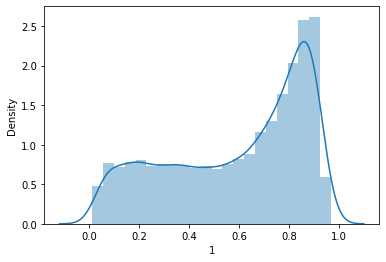

In [19]:
import seaborn as sns
sns.distplot(predictions_prob[1])